# Import & Data check

### - Import

In [1]:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
import numpy as np # linear algebra
import pandas as pd # data processing


import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, save
import plotly.graph_objects as go
import sklearn
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
pd.plotting.register_matplotlib_converters()

### - 데이터 확인

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
test_df

,ForecastId,Province_State,Country_Region,Date
0,1,NaN,Afghanistan,2020-03-26
1,2,NaN,Afghanistan,2020-03-27
2,3,NaN,Afghanistan,2020-03-28
3,4,NaN,Afghanistan,2020-03-29
4,5,NaN,Afghanistan,2020-03-30
...,...,...,...,...
13153,13154,NaN,Zimbabwe,2020-05-03
13154,13155,NaN,Zimbabwe,2020-05-04
13155,13156,NaN,Zimbabwe,2020-05-05
13156,13157,NaN,Zimbabwe,2020-05-06


In [3]:
train_df.shape, test_df.shape

# train 데이터는 22644개의 데이터와 6개의 feature
# test 데이터는 13158개의 데이터와 4개의 feature

((22644, 6), (13158, 4))

In [4]:
train_df.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22644 entries, 0 to 22643
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              22644 non-null  int64  
 1   Province_State  9620 non-null   object 
 2   Country_Region  22644 non-null  object 
 3   Date            22644 non-null  object 
 4   ConfirmedCases  22644 non-null  float64
 5   Fatalities      22644 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.0+ MB


In [6]:
train_df.drop('Province_State',axis=1,inplace=True)

결측치가 많은 Province_State 칼럼은 예측에 유용하지 않으므로 버림

In [7]:
train_df['Country_Region'].nunique() #Country_Region 칼럼의 고유값 개수 (총 180개의 나라가 코로나의 영향을 받았음)

180

In [8]:
# Date칼럼을 Datetime자료형으로 재설정하고 데이터프레임의 인덱스로 만듬
train_df['Date']=pd.to_datetime(train_df['Date'])
train_df.set_index('Date',inplace=True)

In [9]:
train_df.head()

,Id,Country_Region,ConfirmedCases,Fatalities
Date,,,,
2020-01-22,1,Afghanistan,0.0,0.0
2020-01-23,2,Afghanistan,0.0,0.0
2020-01-24,3,Afghanistan,0.0,0.0
2020-01-25,4,Afghanistan,0.0,0.0
2020-01-26,5,Afghanistan,0.0,0.0


# EDA (Exploratory Data Analysis)

#### Qs1. Which countries has high number of cases? (발병 건수가 많은 나라는?)


#### Qs2. How is confirmed cases increases by day? (확진 건수는 어떻게 나날이 증가하는가?)


#### Qs3. What is fatality rate of confirmed cases? ( 확진 판례의 치사율은?)


#### Qs4. How is cases increasing by day of 1st reported case? (첫 사례가 보고된 날부터 어떻게 증가하고 있는가?)


#### Qs5. Understanding data of India and comparing it with the world? (인도의 데이터를 분석하고 세계와 비교)


#### Qs6. What is new rate of increase per case per day? ( 하루당 확진 건수의 증가율은?)


** 먼저 12개의 나라의 코로나 확산 형태를 분석하고, 이를 다른 나라들로 확장하여 예측할 것임




### - 발병건수/사망률 많은 나라 

### pd.pivot_table(data, values, index, columns, aggfunc) : 데이터 재구조화
- data: 분석할 데이터프레임 
- values: 분석할 데이터프레임에서 분석할 열
- index: 행 인덱스로 들어갈 키 열 또는 키 열의 리스트
- columns: 열 인덱스로 들어갈 키 열 또는 키 열의 리스트
- aggfunc: 분석 메서드


In [10]:
pivot=pd.pivot_table(train_df,columns='Country_Region',index='Date',values='ConfirmedCases',aggfunc=np.sum)
pivot_fatality=pd.pivot_table(train_df,columns='Country_Region',index='Date',values='Fatalities',aggfunc=np.sum)

pivot

Country_Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-31,174.0,243.0,716.0,376.0,7.0,7.0,1054.0,532.0,4559.0,10180.0,...,645.0,664.0,25481.0,338.0,172.0,135.0,212.0,119.0,35.0,8.0
2020-04-01,237.0,259.0,847.0,390.0,8.0,7.0,1054.0,571.0,4862.0,10711.0,...,794.0,814.0,29865.0,338.0,181.0,143.0,218.0,134.0,36.0,8.0
2020-04-02,273.0,277.0,986.0,428.0,8.0,9.0,1133.0,663.0,5116.0,11129.0,...,897.0,1024.0,34173.0,350.0,205.0,146.0,233.0,161.0,39.0,9.0


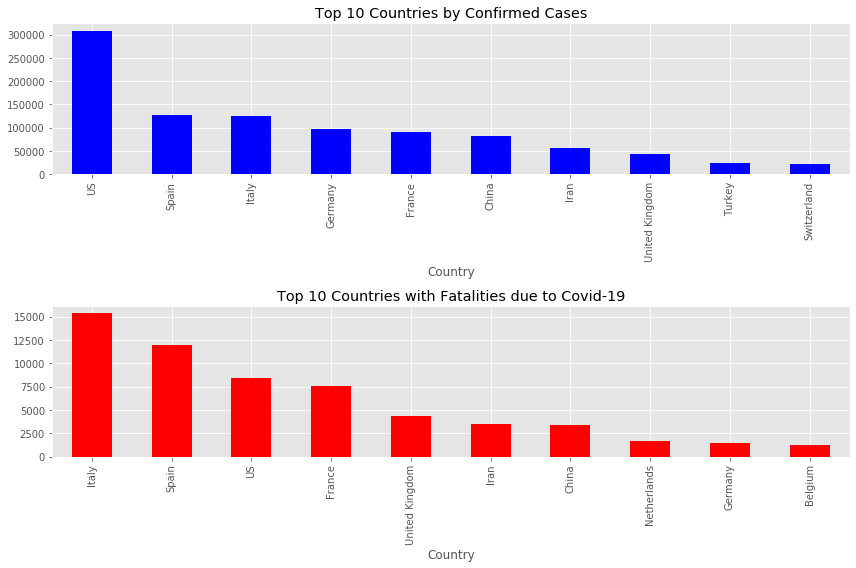

In [11]:

country_list=[]
value_list=[]
fatality_list=[]


for country in list(pivot.columns):
    country_list.append(country)
    value_list.append(pivot[country].max())
    fatality_list.append(pivot_fatality[country].max())
    new_dict={'Country':country_list,'Confirmed':value_list,'Fatality':fatality_list}
    
df=pd.DataFrame.from_dict(new_dict) # 데이터프레임 구축
df.set_index('Country',inplace=True)


# 확진건수와 사망률이 높은 10개 나라의 그래프
plt.figure(figsize=(12,8)) # 그래프 크기 지정

plt.subplot(2,1,1) #Figure를 2x1 그리드로 나누고, 1로 지정된 위치에 좌표축을 만듬
df['Confirmed'].sort_values(ascending=False)[:10].plot(kind='bar',color='blue')
plt.title('Top 10 Countries by Confirmed Cases')
plt.subplot(2,1,2) #Figure를 2x1 그리드로 나누고, 2로 지정된 위치에 좌표축을 만듬
df['Fatality'].sort_values(ascending=False)[:10].plot(kind='bar',color='red')
plt.title('Top 10 Countries with Fatalities due to Covid-19')
plt.tight_layout() # 여백에 관련된 서브플롯 파라미터 조정

In [12]:
# Make List of Top 10 Countries and India and Netherlands- The Countries of interest.
# 확진건수가 많은 10개의 나라와 별도로 관심이 가는 인도와 네덜란드를 리스트로 추림

top_confirmed=df.sort_values(by='Confirmed',ascending=False)[:10]
list_countries=list(top_confirmed.index)
list_countries.append('India')
list_countries.append('Netherlands')

### - 나라별 누적 확진자수 그래프

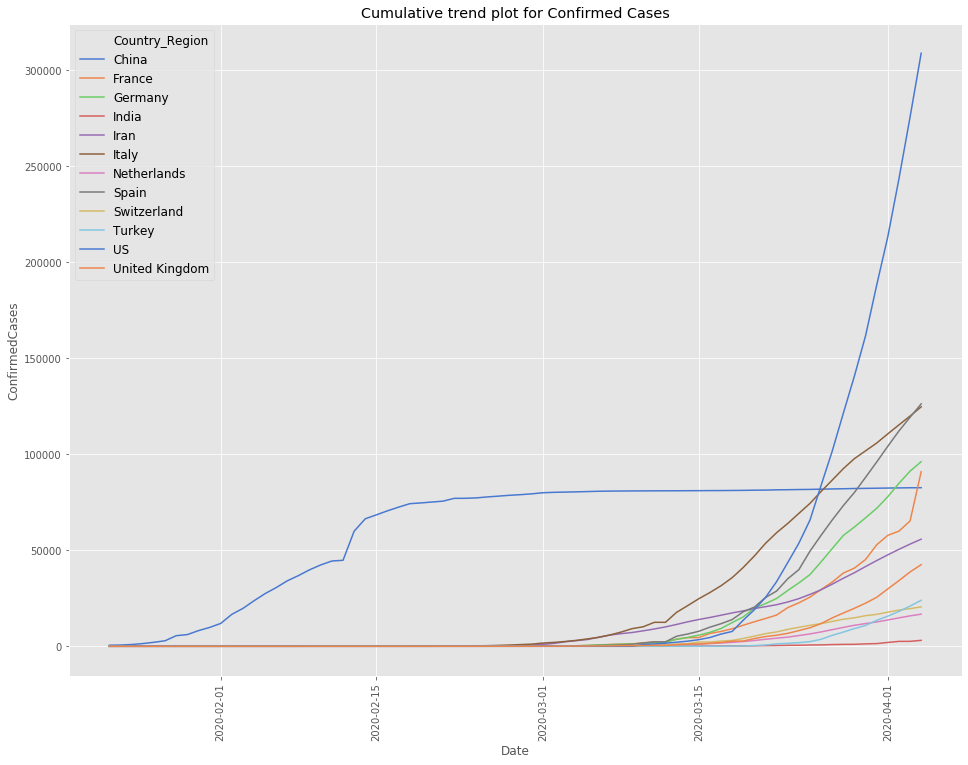

In [13]:
times_series_cntr = train_df.groupby(['Date','Country_Region'])['ConfirmedCases'].sum().reset_index().set_index('Date')

df_countries_tm = times_series_cntr[times_series_cntr['Country_Region'].isin(list_countries)] #list_country에 있는 나라로 추림


plt.figure(figsize=(16,12))
ax = sns.lineplot(x=df_countries_tm.index, y="ConfirmedCases", hue="Country_Region", data=df_countries_tm,palette='muted').set_title('Cumulative line')
plt.legend(loc=2, prop={'size': 12})
plt.title('Cumulative trend plot for Confirmed Cases')
plt.xticks(rotation=90);

- 중국은 확진자 수가 안정화되는 반면, 다른 나라들도 모두 증가 추세를 보이고 있음
- 확진자수가 갑자기 증가한 시점이 각 나라들 마다 차이가 있음
- 인도는 2020년 4월 2일까지 확진신고가 매우 적지만 2020년 3월 15일 이후 확진신고가 급증함

### - 날짜별 확진자수 그래프

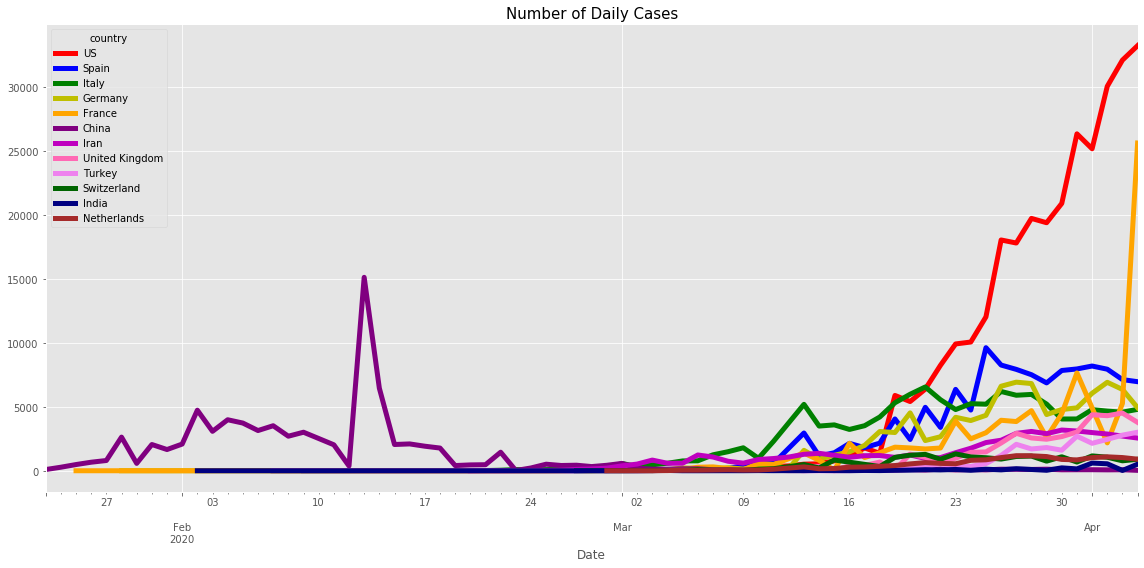

In [14]:
# 12개 나라 확진자수 한번에 그림

Confirm_pivot=pd.pivot_table(train_df,index='Date',columns='Country_Region',values='ConfirmedCases',aggfunc=np.sum)

plt.figure(figsize=(16,8))
colors=['r','b','g','y','orange','purple','m','hotpink','violet','darkgreen','navy','brown']

for i,country in enumerate(list_countries):
    # Confirm_pivot은 누적 확진자수 나타내므로 날짜간 확진자수 차이를 구하고 결측치에는 0 대입
    Confirm=Confirm_pivot[Confirm_pivot[country]>0][country].diff().fillna(0) 
    Confirm=Confirm[Confirm>0] 
    Confirm.plot(color=colors[i],label=country,markersize=12,lw=5)    
    plt.title('Number of Daily Cases',fontsize=15)
    plt.legend(title='country')

plt.tight_layout() # 여백에 관련된 서브플롯 파라미터 조정

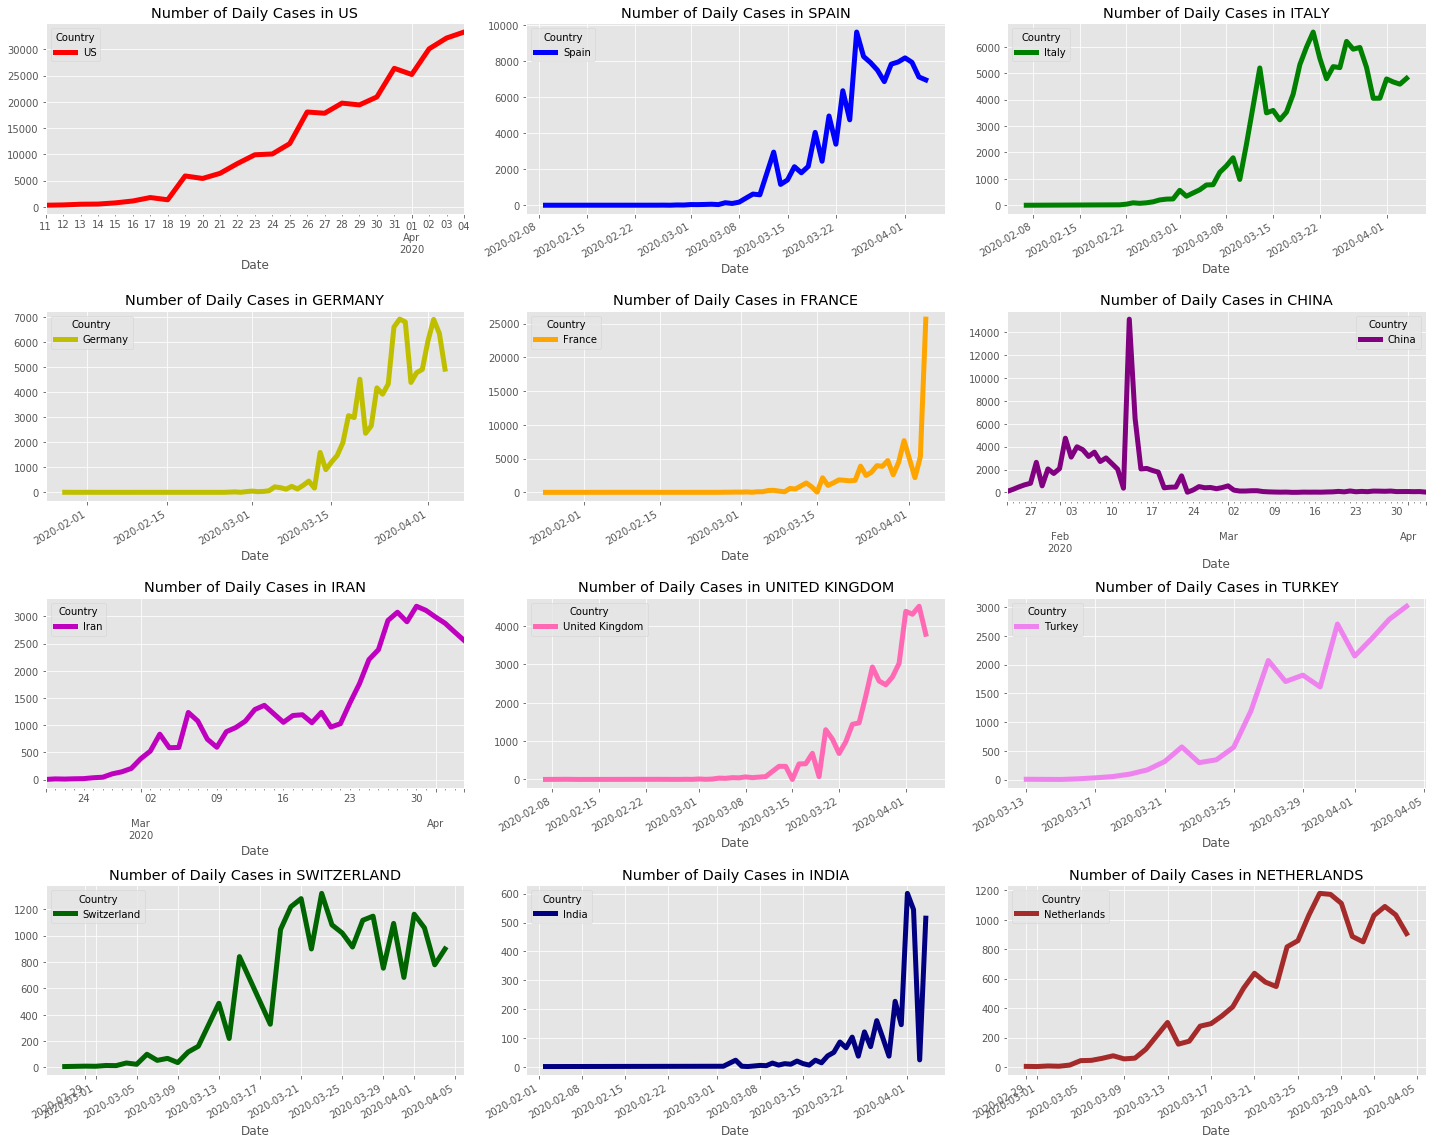

In [15]:
# 각 나라의 날짜별 확진자수 그래프

plt.figure(figsize=(20,16))
colors=['r','b','g','y','orange','purple','m','hotpink','violet','darkgreen','navy','brown']

for i,country in enumerate(list_countries):
    Confirm=Confirm_pivot[Confirm_pivot[country]>0][country].diff().fillna(0)
    Confirm=Confirm[Confirm>0]
    
    plt.subplot(4,3,i+1)
    Confirm.plot(color=colors[i],label=country,markersize=12,lw=5)    
    plt.xticks()
    plt.legend(title='Country')
    plt.title('Number of Daily Cases in {}'.format(country.upper()))
    
plt.tight_layout() # 여백에 관련된 서브플롯 파라미터 조정

In [16]:
for country in list_countries:
    id_max=Confirm_pivot[country].diff().fillna(0).idxmax() # 행의 maximum value
    maxim=Confirm_pivot[country].diff().fillna(0).max()
    print('Maximum New Cases registered for {0} was {1} on {2}'.format(country,maxim,id_max))

Maximum New Cases registered for US was 33264.0 on 2020-04-04 00:00:00
Maximum New Cases registered for Spain was 9630.0 on 2020-03-25 00:00:00
Maximum New Cases registered for Italy was 6557.0 on 2020-03-21 00:00:00
Maximum New Cases registered for Germany was 6933.0 on 2020-03-27 00:00:00
Maximum New Cases registered for France was 25646.0 on 2020-04-04 00:00:00
Maximum New Cases registered for China was 15136.0 on 2020-02-13 00:00:00
Maximum New Cases registered for Iran was 3186.0 on 2020-03-30 00:00:00
Maximum New Cases registered for United Kingdom was 4516.0 on 2020-04-03 00:00:00
Maximum New Cases registered for Turkey was 3013.0 on 2020-04-04 00:00:00
Maximum New Cases registered for Switzerland was 1321.0 on 2020-03-23 00:00:00
Maximum New Cases registered for India was 601.0 on 2020-04-01 00:00:00
Maximum New Cases registered for Netherlands was 1179.0 on 2020-03-27 00:00:00


### - 날짜별 사망자 그래프

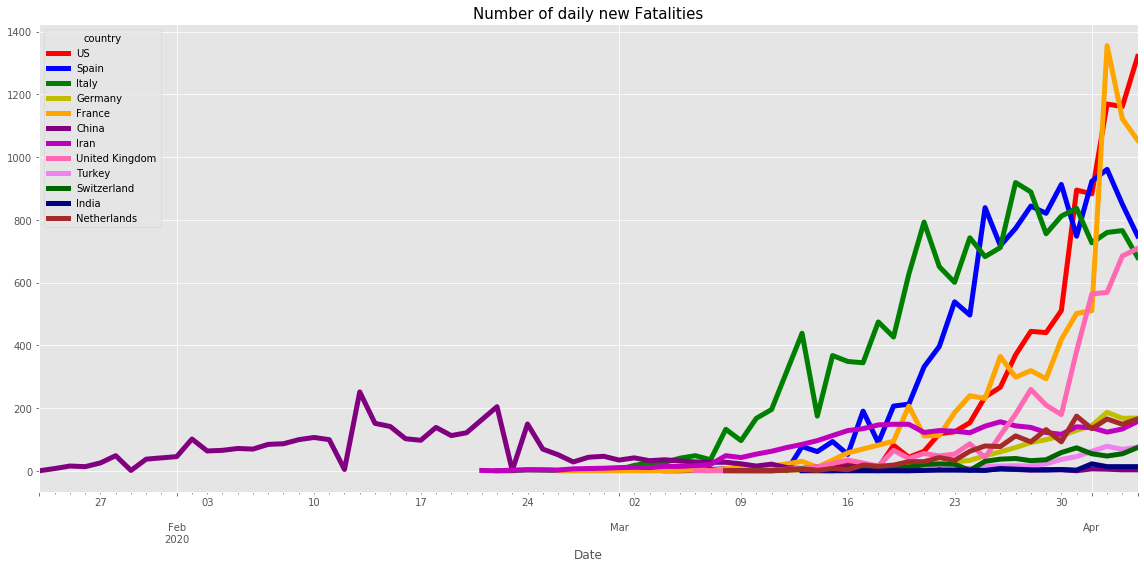

In [17]:
# 12개 나라 시망자수 한번에 그림

Fatal_pivot=pd.pivot_table(train_df,index='Date',columns='Country_Region',values='Fatalities',aggfunc=np.sum)

plt.figure(figsize=(16,8))
for i,country in enumerate(list_countries):
    Fatal_diff=Fatal_pivot[(Fatal_pivot[country]>0)][country].diff().fillna(0)
    Fatal_diff=Fatal_diff[Fatal_diff>0]
    Fatal_diff.plot(color=colors[i],label=country,lw=5)
    plt.title('Number of daily new Fatalities',fontsize=15)
    plt.legend(title='country')
plt.tight_layout() # 여백에 관련된 서브플롯 파라미터 조정

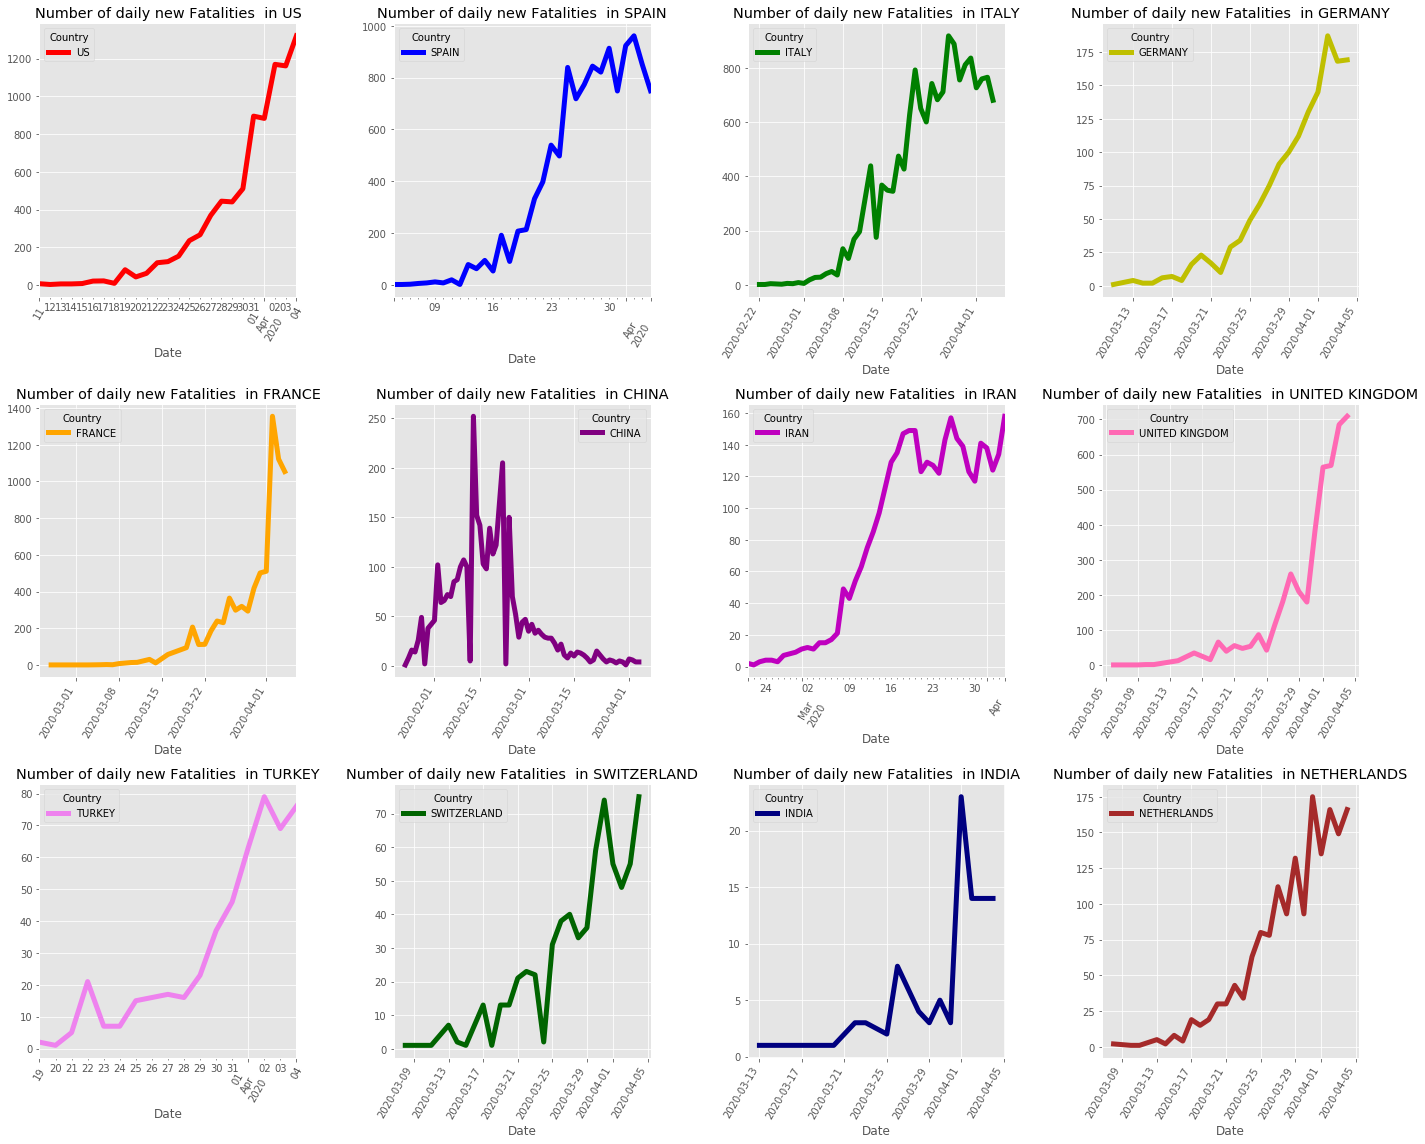

In [18]:
# 각 나라의 날짜별 사망자수 그래프

plt.figure(figsize=(20,16))

for i,country in enumerate(list_countries):
    Fatal_diff=Fatal_pivot[(Fatal_pivot[country]>0)][country].diff().fillna(0)
    Fatal_diff=Fatal_diff[Fatal_diff>0]
   
    plt.subplot(3,4,i+1)
    Fatal_diff.plot(color=colors[i],label=country.upper(),lw=5)
    plt.xticks(rotation=60)
    plt.title('Number of daily new Fatalities  in {}'.format(country.upper()))
    plt.legend(title='Country')

plt.tight_layout() # 여백에 관련된 서브플롯 파라미터 조정


### - 전날대비 확진자수 변동 그래프

Text(0.5, 0.98, 'Variation in number of confirmed cases on daily basis')

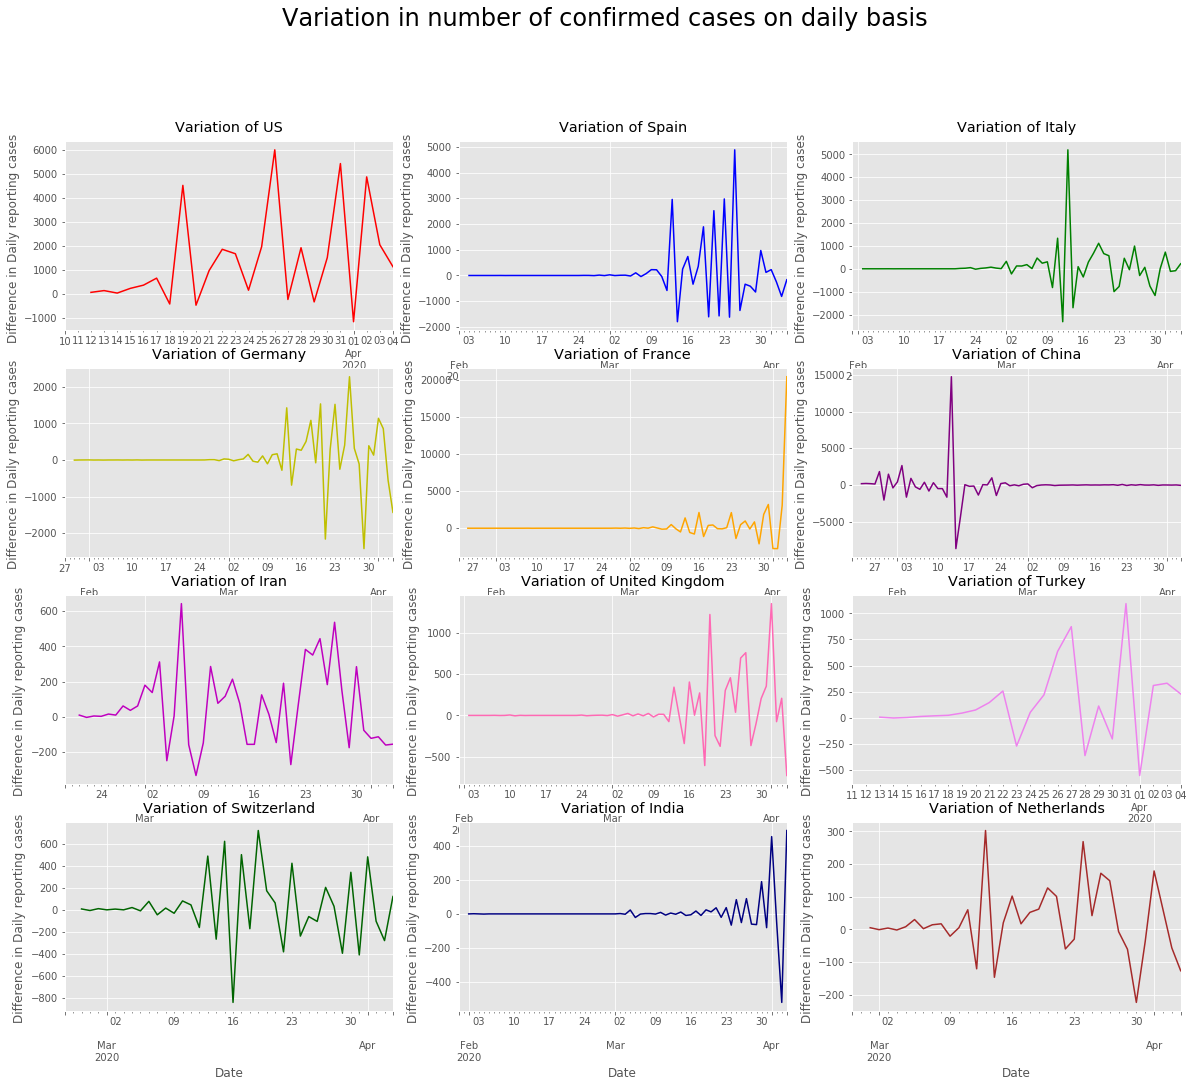

In [19]:
# Understanding New cases confirmation variations on daily basis
# 나라별

plt.figure(figsize=(20,16))

for i,country in enumerate(list_countries):
    plt.subplot(4,3,i+1)
    train_df[(train_df['Country_Region']==country)&(train_df['ConfirmedCases']!=0)].groupby('Date')['ConfirmedCases'].sum().diff().diff().plot(color=colors[i])
    plt.ylabel('Difference in Daily reporting cases ')
    plt.title('Variation of {}'.format(country),va='bottom')
plt.suptitle('Variation in number of confirmed cases on daily basis',fontsize=24,va='baseline')

### - 코로나 발생 첫날 이후의 확진자수 추이 그래프

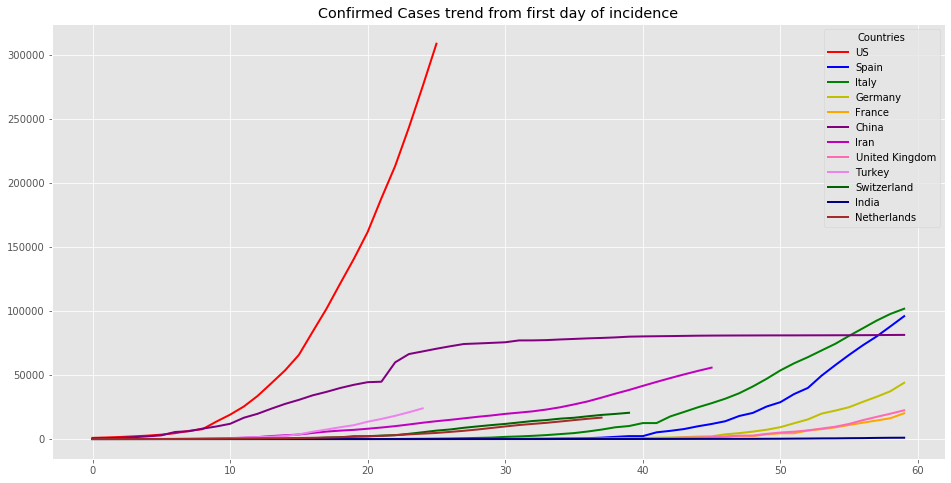

In [20]:
plt.figure(figsize=(16,8)) # 그래프 크기 설정

plt.title('Confirmed Cases trend from first day of incidence') # 그래프 제목 설정

for i,country in enumerate(list_countries):
    # .agg()는 집계함수 - 나라별 확진자수 합을 날짜 기준으로 groupby 하여 집계
    confirm_group=train_df[(train_df['Country_Region']==country)&train_df['ConfirmedCases']!=0].groupby('Date').agg({'ConfirmedCases':['sum']})
    confirm_value=[j for j in confirm_group.ConfirmedCases['sum'].values]
    plot_value=confirm_value[0:60]
    plt.plot(plot_value,color=colors[i],label=country,lw=2)
    plt.legend(title='Countries')

### - 코로나 발생 첫날 이후의 사망자수 추이 그래프

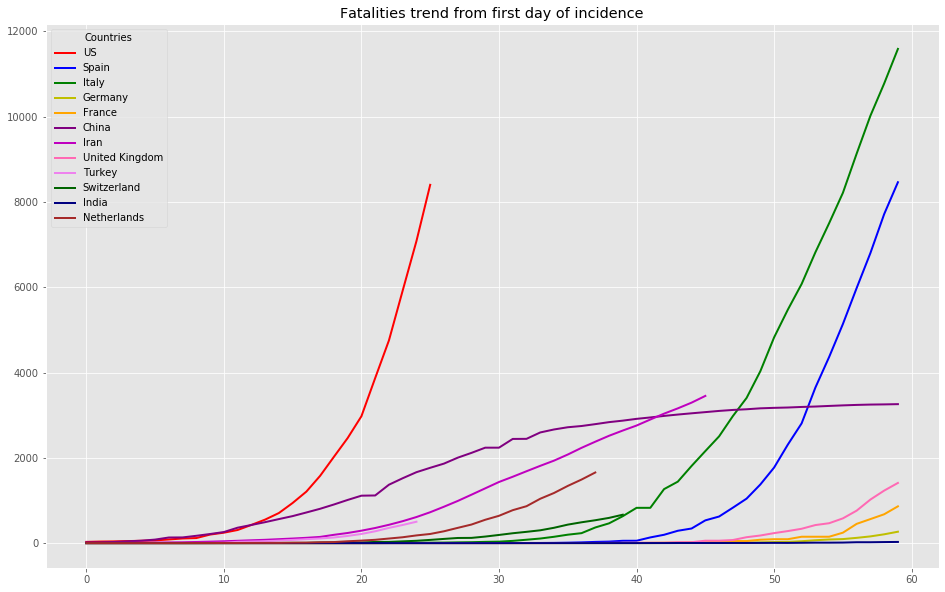

In [21]:
plt.figure(figsize=(16,10))

plt.title('Fatalities trend from first day of incidence')

for i,country in enumerate(list_countries):
    fatal_group=train_df[(train_df['Country_Region']==country)&train_df['ConfirmedCases']!=0].groupby('Date').agg({'Fatalities':['sum']})
    fatal_value=[j for j in fatal_group.Fatalities['sum'].values]
    plot_value=fatal_value[0:60]
    plt.plot(plot_value,color=colors[i],label=country,lw=2)
    plt.legend(title='Countries')

### - 전세계 확진자수/사망자수 추이

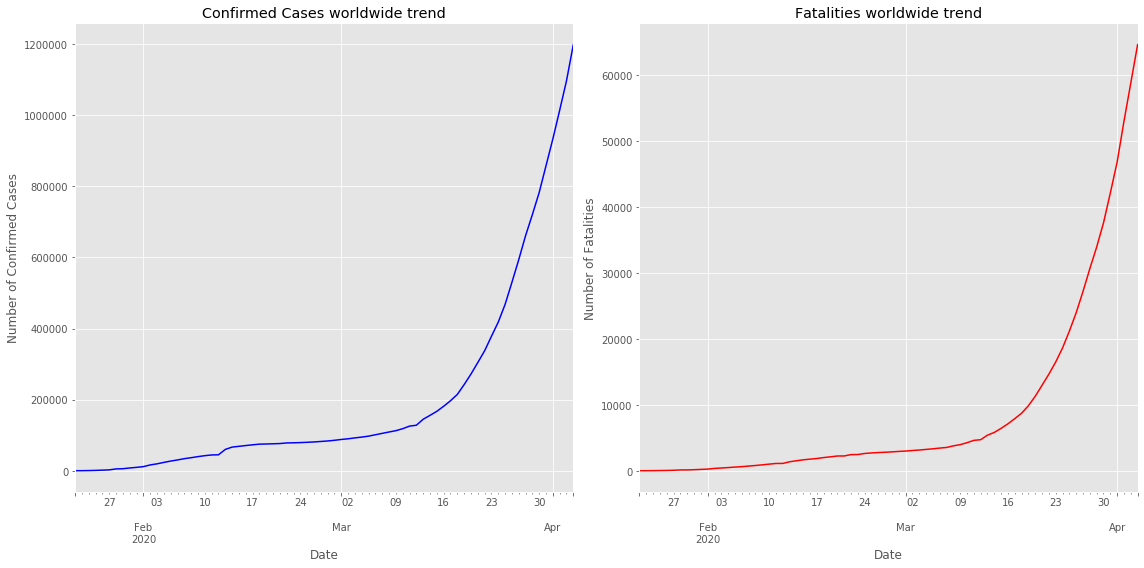

In [22]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1) 

# 날짜를 기준으로한 확진자수의 누적합을 그래프로 나타냄
train_df.groupby('Date')['ConfirmedCases'].sum().plot(color='blue')
plt.ylabel('Number of Confirmed Cases')
plt.title('Confirmed Cases worldwide trend')

plt.subplot(1,2,2)

# 날짜를 기준으로한 사망자수의 누적합을 그래프로 나타냄
train_df.groupby('Date')['Fatalities'].sum().plot(color='r')
plt.ylabel('Number of Fatalities')
plt.title("Fatalities worldwide trend")

plt.tight_layout() # 여백에 관련된 서브플롯 파라미터 조정

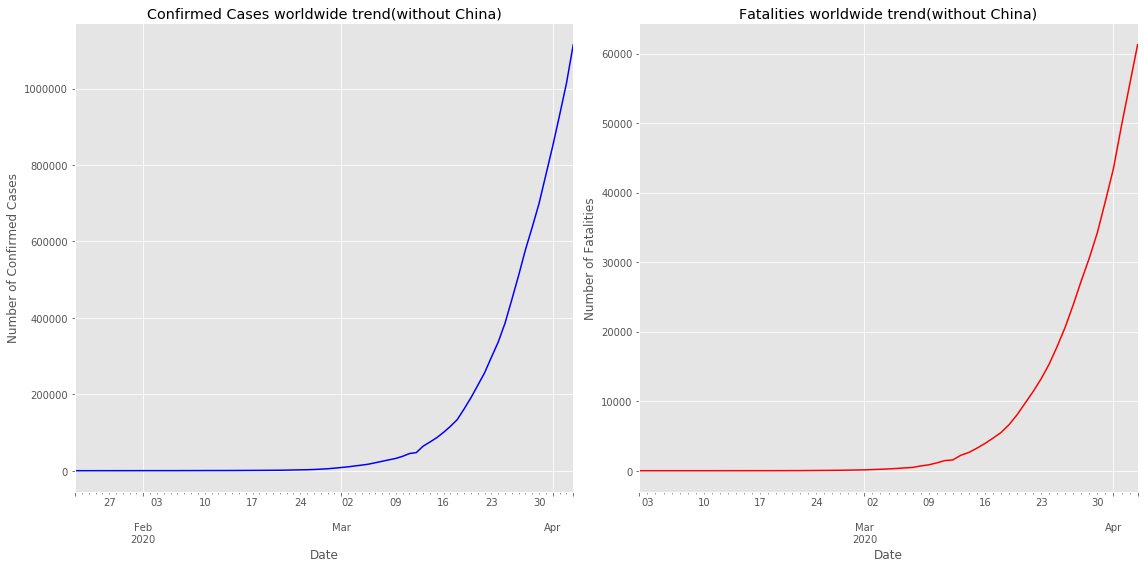

In [23]:
# 중국을 제외한 그래프

plt.figure(figsize=(16,8))

plt.subplot(1,2,1)

train_df[(train_df['Country_Region']!='China')&(train_df['ConfirmedCases']!=0)].groupby('Date')['ConfirmedCases'].sum().plot(color='blue')
plt.ylabel('Number of Confirmed Cases')
plt.title('Confirmed Cases worldwide trend(without China)')

plt.subplot(1,2,2)

train_df[(train_df['Country_Region']!='China')&(train_df['Fatalities']!=0)].groupby('Date')['Fatalities'].sum().plot(color='red')
plt.ylabel('Number of Fatalities')
plt.title("Fatalities worldwide trend(without China)")
plt.tight_layout() # 여백에 관련된 서브플롯 파라미터 조정

### - observation

1. 중국이 코로나19의 주요 희생자이며 12월에 처음 발생건수가 확인됨. 이 데이터셋은 1월 22일 이후의 데이터만 있는데, 그때까지 확인된 사례만 533건에 달함. 반면, 이탈리아는 1월 31일 처음 2건의 확진사례가 발생하였고 그 시점에서 26일 이후까지 453명의 확진건수가 발생함. 그 이후 확인된사례의 수가 매일 21%씩 증가함.


2. 반면, 미국은 1월 초 중국에서 온 여행자에 의해 첫 확진자가 발생하고 2월 24일까지는 36건의 사례가 보고되었고, 3월 12일까지 400건 정도의 사례가
발견됨. 그 이후로 확진자수는 기하급수적으로 늘어나 매일 50%의 증가율을 보이고 있음


3. 네덜란드는 매우 다른 궤적을 보임. 2월 27일, 미국과 이탈리아보다 상당히 늦게 첫 확진자가 나타났지만 500명이 되기까지 12일 밖에 걸리지 않음.
이는 네덜란드 감시체계에 허점이 있었다고 볼 수 있음그 후 매일 20%의 증가율을 보임.



4. 인도는 2020년 1월 30일 이탈리아에서 처음 확인된 사례에 상당히 가까운 시점에 첫 번째 사례를 발견함. 그러나 3월 12일까지 500건의 확진 사례만
보고됨. 그 이유는 확인되지 않았지만 다음과 같다고 추측됨:
    - 적은 test횟수
    - 감시 및 탐지 불량
    - 감염자들로부터의 적은 도착
    - 더 나은 통제 메커니즘
    
그러나, 인도 역시 다른 나라와 같은 추세를 보이기 시작하고 매일 확진자수가 늘어나고 있음. 또한 다른 나라에 비교하면 인도의 test양은 상당히 작음.


5. 전체적인 지수곡선은 중국을 포함하거나, 포함하지 않고 볼 수 있음. 중국의 새로운 확진사례는 적어졌는데, 이는 국가 기관의 엄격한 사회적 거리두기 강행 때문임.
그러나 전세계적으로 점점 확진사례들이 기하급수적으로 늘어나고 있음.


6. 그럼에도 불구하고 매일 사례 증가율은 큰 변화를 보임. 이 중 극명한 대조는 2월 13일 15079건으로 사례 보고가 가장 많고, 2월 14일 사례 보고가 갑자기 6415건으로 줄어든 중국이 보여줌. 그 후 증가율은 평균의 40%로 줄어듬. 확진자수 사례 보고가 갑자기 57% 줄어든 것은 이상한 일임. 그 이유를 추측해 보면: 
 - 1월 22일 우한에서 시행된 도시 폐쇄는 그 영향을 보여주기 시작했고 중국은 바이러스 방지에 성공함. 이것은 바이러스의 확산이 중지되었고 중국이 모든 감염자들을 추적했다는 가정이 있어야함. 
 - 중국은 사실상 감염자수 보고를 중단함. 실시간 추적은 억제됨.
            
            
7. 확진 사례의 그래프를 비교해 보면, 갑작스럽게 증가한 미국과 비교했을 때, 대부분 매일 평균 20%의 새로운 환자가 증가하는 추이를 보임.

# Feature Translation

In [24]:
test_df['Date']=pd.to_datetime(test_df['Date'])
test_df

,ForecastId,Province_State,Country_Region,Date
0,1,NaN,Afghanistan,2020-03-26
1,2,NaN,Afghanistan,2020-03-27
2,3,NaN,Afghanistan,2020-03-28
3,4,NaN,Afghanistan,2020-03-29
4,5,NaN,Afghanistan,2020-03-30
...,...,...,...,...
13153,13154,NaN,Zimbabwe,2020-05-03
13154,13155,NaN,Zimbabwe,2020-05-04
13155,13156,NaN,Zimbabwe,2020-05-05
13156,13157,NaN,Zimbabwe,2020-05-06


In [25]:
test_df['Province_State']=test_df.drop('Province_State',axis=1)

In [26]:
train_df=train_df.reset_index()
train_df.head()

,Date,Id,Country_Region,ConfirmedCases,Fatalities
0,2020-01-22,1,Afghanistan,0.0,0.0
1,2020-01-23,2,Afghanistan,0.0,0.0
2,2020-01-24,3,Afghanistan,0.0,0.0
3,2020-01-25,4,Afghanistan,0.0,0.0
4,2020-01-26,5,Afghanistan,0.0,0.0


In [27]:
# 문자를 숫자, 숫자를 문자로 맵핑
from sklearn.preprocessing import LabelEncoder

# 라벨 인코더 생성
LE=LabelEncoder()

# train데이터의 Country Region을 피팅하고 라벨숫자로 변환한다
train_df['Country_Region']=LE.fit_transform(train_df['Country_Region'])
test_df['Country_Region']=LE.transform(test_df['Country_Region'])

#날짜 정보를 문자열로 바꿔주는 strftime() 메서드 사용
train_df.loc[:, 'Date'] = train_df.Date.dt.strftime("%m%d")
#다시 int형으로 변환
train_df["Date"]  = train_df["Date"].astype(int)

test_df.loc[:, 'Date'] = test_df.Date.dt.strftime("%m%d")
test_df["Date"]  = test_df["Date"].astype(int)
test_df

,ForecastId,Province_State,Country_Region,Date
0,1,1,0,326
1,2,2,0,327
2,3,3,0,328
3,4,4,0,329
4,5,5,0,330
...,...,...,...,...
13153,13154,13154,179,503
13154,13155,13155,179,504
13155,13156,13156,179,505
13156,13157,13157,179,506


In [28]:
#Select feature column names and target variable we are going to use for training
# train 데이터로 들어갈 피처와 target피처를 설정
features=['Date','Country_Region']
target = 'ConfirmedCases'

#This is input which our classifier will use as an input.
train_df[features].head(10)

,Date,Country_Region
0,122,0
1,123,0
2,124,0
3,125,0
4,126,0
5,127,0
6,128,0
7,129,0
8,130,0
9,131,0


# Random Forest

## - 배경 : 앙상블
여러 base 모델들의 예측을 다수결 법칙 또는 평균을 이용해 통합하여 예측 정확성을 향상시키는 방법
![title](ensemble.jpg)

Random forest 모델은 base 모델로 decision tree(의사결정나무) 사용


## - 개요
- 다수의 의사결정나무모델에 의한 예측을 종합하는 앙상블 방법
- 일반적으로 하나의 의사결정나무모델보다 높은 예측 정확성을 보임
- 관측치 수에 비해 변수의 수가 많은 고차원 데이터에서 널리 활용됨


## - 핵심 아이디어: Diversity, Random
    1. 여러개의 training data를 생성하여 각 데이터마다 개별 decision tree 구축 → Bagging
    2. decision tree 구축 시 변수 무작위로 선택 → random subspace

### Bagging(Bootstrap + Aggregating) : 각각의 bootstrap 샘플로부터 생성된 모델을 합침
![title](bagging.jpg)


1. bootstrapping : 무작위로 중복을 허용해서 original데이터와 같은 크기의 n개의 데이터를 선택하는 과정(random sampling)
    
   이론적으로 한 개체가 하나의 bootstrap에 한번도 선택되지 않을 확률 p = (1-1/n)^n → 0.368(n이 무한대로 갈때)
    ![title](tempsnip.jpg)


2. Result Aggregating
    - Majority voting
    ![title](majority.jpg)
    10개의 decision tree모델이 있다고 하면, 그 모델들이 최종적으로 뽑은 결과가 있을 텐데, 그중에서 가장 많이 뽑힌 것을 최종 결과로 나타냄
    
    - Weight voting1(weight = training accuracy of individual models) 가중평균
    ![title](weight.jpg)
        예를 들어 y = 0 일때, (0.91 + 0.77 + 0.95 + 0.82) / (모든 training accuracy 합) = 0.424
        
    - Weight voting2(weight = predicted probability for each class) 가중평균
    ![title](weight1.jpg)
        즉, y = 1일 확률을 가지고 구함



### Random subspace
   1. 원래 변수들 중에서 모델 구축에 쓰일 입력변수(column)를 무작위로 선택(중복X)
       ![title](0.jpg)
       일반적으로 변수의 수에 따라 얼만큼 선택할지 달라짐
           Classification : √변수의 수
           Regression : 변수의 수/3
   2. 선택된 입력 변수 중 분할될 변수(가장 성능이 좋은 변수)를 선택
       ![title](1.jpg)
       ![title](2.jpg)
   3. 위의 과정을 full-grown tree가 될때까지 반복(leaf node가 마지막이 될때까지)
       ![title](3.jpg)
    
결과적으로, decision tree의 분기점을 탐색할 때, 원래의 변수(columns)의 개수보다 적은 수의 변수를 임의로 선택하여 해당 변수들만을 고려 대상으로 함
 ![title](11.jpg)



### 개별 decision tree의 정확도, 독립성이 높을수록 random forest의 성능이 높아지는데, Bagging과 Random subspace 기법은 각 모델들의 독립성, 일반화, 무작위성을 최대화시켜 모델간의 상관관계를 감소시킴
또한, tree수가 충분히 많을때 과적함 되지 않음


## - 변수의 중요도 관찰

랜덤포레스트는 회귀 모델과는 달리 개별 변수가 통계적으로 얼마나 유의한지에 대한 정보를 제공하지 않음

대신, 다음과 같은 간접적인 방식으로 변수의 중요도를 결정
   1. 원래 데이터 집합에 대해서 Out of bag(OOB) Error를 구함
   
       Out of bag : bootstrapping 데이터 셋에 포함되지 않은 데이터 → 검증 집합으로 사용
       
       Out of bag Error : OOB들을 decision tree에 대입했을 때 나타난 결과 (tree개수(n)만큼 생성)
       
       이를 각각 r(i)라고 하자(r(1), r(2) ... r(n)까지 총 n개 존재)
       
       
   2. 중요도를 구하고자 하는 특정 변수(column)의 값을 임의로 뒤섞은 데이터 집합에 대해서 OOB Error를 구함(똑같이 tree개수(n)만큼 생성)
   
       이를 각각 e(i)라고 하자(e(1), e(2) ... e(n)까지 총 n개 존재)
       
       
   3. 개별 변수의 중요도는 2단계와 1단계 OOB Error 차이의 평균과 분산을 고려하여 결정
   
       d(i) = e(i) - r(i) : 1단계와 2단계 OOB Error 차이
       
       d(i)의 평균값이 클수록 해당 변수(column)가 다른 값으로 대체되었을때 성능이 현저히 안좋아진다는 것을 의미 → 즉, 변수 중요도가 높음
       
       특정 변수(column) X의 중요도 : (d(i)들의 평균) / (d(i)들의 표준편차) 

# 최종 과정

![title](random.jpg)
## Step1 : "bootstrapped"데이터셋 생성하기


## Step2 : bootstrapped 데이터 샘플에서 column을 중복 허용없이 임의의 d개 선택해 decision tree 생성

## Step3 : 위의 과정을 n번 반복

## Step4 : n개의 decision tree의 분류 결과를 취합해 최종적으로 voting을 통해 예측을 수행

## Step5 : OOB Error를 통해 성능평가

## - Random Forest 파라미터

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

n_estimators : 랜덤 포레스트 안의 결정 트리 갯수

bootstrap : bootstrapping 여부

max_depth : 트리의 최대 깊이 
   -  default = None → 완벽하게 클래스 값이 결정될 때 까지 분할 or 데이터 개수가 min_samples_split보다 작아질 때까지 분할
   - 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요

max_features : 무작위로 선택할 최대 Feature의 개수 → randoms subspace에서 선택하는 변수(column)의 개수를 말함
   - Default = 'auto' : 전체 피처 중 √(피처개수) 만큼 선정
    
max_leaf_nodes : 리프노드의 최대 개수

max_samples : 데이터 샘플 중 선택할 샘플의 수 혹은 비율의 최대값

min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터수 → 과적합을 제어

min_samples_leaf : 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수 → 과적합을 제어

n_jobs : 사용할 CPU 코어 개수 → 클수록 수행속도가 빠름

oob_score : OOB 평가 수행여부

random_state : 난수 발생을 위한 seed의 인자값

# Confirmed Cases

In [29]:
from sklearn.ensemble import RandomForestClassifier

# 모델 정의
rfcla = RandomForestClassifier(n_estimators=100, max_samples=0.8, random_state=1, n_jobs=-1)

# 학습
rfcla.fit(train_df[features],train_df[target])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=0.8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [30]:
#Make predictions using the features from the test data set
predictions = rfcla.predict(test_df[features])

predictions

array([ 94., 110., 110., ...,   9.,   9.,   9.])

In [31]:
# 최적의 파라미터 찾기
"""
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators'      : [100,200,300],
    'max_depth'         : [6, 8, 10, 12, 14],
    'min_samples_leaf'  : [1, 3, 5, 7]
}

rf_grid = GridSearchCV(rfcla, param_grid=parameters, scoring="accuracy", n_jobs=-1, verbose=1)
rf_grid.fit(train_df[features],train_df[target])

print("최고 평균 정확도 : {0: .4f}".format(rf_grid.best_score_))
printf("최고 파라미터 : ", rf_grid.best_params_)
"""

'\nfrom sklearn.model_selection import GridSearchCV\n\nparameters = {\n    \'n_estimators\'      : [100,200,300],\n    \'max_depth\'         : [6, 8, 10, 12, 14],\n    \'min_samples_leaf\'  : [1, 3, 5, 7]\n}\n\nrf_grid = GridSearchCV(rfcla, param_grid=parameters, scoring="accuracy", n_jobs=-1, verbose=1)\nrf_grid.fit(train_df[features],train_df[target])\n\nprint("최고 평균 정확도 : {0: .4f}".format(rf_grid.best_score_))\nprintf("최고 파라미터 : ", rf_grid.best_params_)\n'

# Fatalities

In [32]:
target2='Fatalities'

In [33]:
# 모델 정의
rfcla2 = RandomForestClassifier(n_estimators=100, max_samples=0.8, random_state=1)
# 학습
rfcla2.fit(train_df[features],train_df[target2])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=0.8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [34]:
#Make predictions using the features from the test data set
predictions2 = rfcla2.predict(test_df[features])

print(predictions2[0:50])

[ 4.  4.  4.  4.  4.  4.  4.  6.  6.  7.  7.  7.  7.  7.  7.  7.  7.  7.
  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.
  7.  7.  7.  7.  7.  7.  7.  6.  8. 10. 10. 11. 15. 15.]
